<a href="https://colab.research.google.com/github/muditstja/Deep-learning/blob/main/CNN_LSTM_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta==0.3.14b
!pip install yfinance==0.2.12
!pip install keras
!pip install tensorflow
!pip install keras-tuner

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'AAPL', start = '2007-03-11',end = '2024-07-11')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-12,3.145357,3.213929,3.142500,3.209643,2.713602,729408400
2007-03-13,3.193214,3.235714,3.157143,3.157143,2.669215,867890800
2007-03-14,3.164286,3.214286,3.140000,3.214286,2.717526,796586000
2007-03-15,3.212857,3.227143,3.189643,3.198929,2.704544,559498800
2007-03-16,3.197857,3.213929,3.190000,3.199643,2.705147,571704000
2007-03-19,3.222857,3.269643,3.199643,3.254643,2.751647,712961200
2007-03-20,3.262500,3.280000,3.252143,3.267143,2.762214,488916400
2007-03-21,3.285357,3.357143,3.273214,3.352500,2.834381,686896000
2007-03-22,3.347500,3.370000,3.321429,3.355714,2.837097,561492400


#Complex data set

In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=14)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=200)

# Assuming 'data' is your DataFrame
data.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)

# data['Target'] = data['Adj Close']-data.Open
# data['Target'] = data['Target'].shift(-1)

# data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)


In [ ]:
data['TargetNextClose'] = data['Adj Close'].shift(-1)
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Date'], axis=1, inplace=True)

In [ ]:
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Date'], axis=1, inplace=True)
data_set = data.iloc[:, 0:7]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Close,Adj Close,Volume
0,3.145357,3.213929,3.142500,3.209643,2.713601,729408400
1,3.193214,3.235714,3.157143,3.157143,2.669215,867890800
2,3.164286,3.214286,3.140000,3.214286,2.717527,796586000
3,3.212857,3.227143,3.189643,3.198929,2.704543,559498800
4,3.197857,3.213929,3.190000,3.199643,2.705147,571704000
5,3.222857,3.269643,3.199643,3.254643,2.751647,712961200
6,3.262500,3.280000,3.252143,3.267143,2.762215,488916400
7,3.285357,3.357143,3.273214,3.352500,2.834380,686896000
8,3.347500,3.370000,3.321429,3.355714,2.837098,561492400
9,3.333929,3.359643,3.332143,3.340000,2.823812,450884000


In [ ]:
data_set_scaled.shape

(4163, 14)

#Simple data set

In [2]:
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Date'], axis=1, inplace=True)
data_set = data.iloc[:, 0:7]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Close,Adj Close,Volume
0,3.145357,3.213929,3.142500,3.209643,2.713602,729408400
1,3.193214,3.235714,3.157143,3.157143,2.669215,867890800
2,3.164286,3.214286,3.140000,3.214286,2.717526,796586000
3,3.212857,3.227143,3.189643,3.198929,2.704544,559498800
4,3.197857,3.213929,3.190000,3.199643,2.705147,571704000
5,3.222857,3.269643,3.199643,3.254643,2.751647,712961200
6,3.262500,3.280000,3.252143,3.267143,2.762214,488916400
7,3.285357,3.357143,3.273214,3.352500,2.834381,686896000
8,3.347500,3.370000,3.321429,3.355714,2.837097,561492400
9,3.333929,3.359643,3.332143,3.340000,2.823812,450884000


In [3]:
import pandas as pd

# Convert to DataFrame
data_set = pd.DataFrame(data_set)
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Calculate additional columns
data_set['turnover'] = data_set['Volume'] * data_set['Close']  # This is just an assumption for turnover calculation
data_set['ups_and_downs'] = data_set['Close'].diff()
data_set['change'] = data_set['Close'].pct_change() * 100

# Fill NaN values generated by diff and pct_change with 0
data_set.fillna(0, inplace=True)

# Rename columns to match required format
data_set.rename(columns={
    'Open': 'opening_price',
    'High': 'highest_price',
    'Low': 'lowest_price',
    'Close': 'closing_price',
    'Volume': 'volume'
}, inplace=True)

# Select relevant columns
data_set = data_set[['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'volume', 'turnover', 'ups_and_downs', 'change']]

# Display the DataFrame
print(data_set)


      opening_price  highest_price  lowest_price  closing_price     volume  \
0          3.145357       3.213929      3.142500       3.209643  729408400   
1          3.193214       3.235714      3.157143       3.157143  867890800   
2          3.164286       3.214286      3.140000       3.214286  796586000   
3          3.212857       3.227143      3.189643       3.198929  559498800   
4          3.197857       3.213929      3.190000       3.199643  571704000   
...             ...            ...           ...            ...        ...   
4358     220.000000     221.550003    219.029999     221.550003   37369800   
4359     221.649994     226.449997    221.649994     226.339996   60412400   
4360     227.089996     227.850006    223.250000     227.820007   59085900   
4361     227.929993     229.399994    226.369995     228.679993   48076100   
4362     229.300003     233.080002    229.250000     232.979996   62627700   

          turnover  ups_and_downs    change  
0     2.341140e+0

In [4]:
features = ['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'volume', 'turnover', 'ups_and_downs', 'change']
target = 'closing_price'

# Calculate the 'closing price' of the next day
data_set['Close_next_day'] = data_set['closing_price'].shift(-1)

# Drop the last row since it will have NaN value in 'Close_next_day'
data_set = data_set.dropna()

# Prepare the dataset
X = data_set[features].values
y = data_set['Close_next_day'].values

# Display the DataFrame
print(data_set)

      opening_price  highest_price  lowest_price  closing_price     volume  \
0          3.145357       3.213929      3.142500       3.209643  729408400   
1          3.193214       3.235714      3.157143       3.157143  867890800   
2          3.164286       3.214286      3.140000       3.214286  796586000   
3          3.212857       3.227143      3.189643       3.198929  559498800   
4          3.197857       3.213929      3.190000       3.199643  571704000   
...             ...            ...           ...            ...        ...   
4357     216.149994     220.380005    215.100006     220.270004   58046200   
4358     220.000000     221.550003    219.029999     221.550003   37369800   
4359     221.649994     226.449997    221.649994     226.339996   60412400   
4360     227.089996     227.850006    223.250000     227.820007   59085900   
4361     227.929993     229.399994    226.369995     228.679993   48076100   

          turnover  ups_and_downs    change  Close_next_day  
0

# MinMax Scalling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.0013772  0.00126002 0.00156386 ... 0.42851318 0.56307372 0.00158257]
 [0.00158981 0.00135621 0.00162935 ... 0.4263747  0.51167651 0.00183081]
 [0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
 ...
 [0.97210063 0.98697409 0.97888871 ... 0.62362496 0.63101004 0.97758351]
 [0.99626825 0.99315592 0.98604511 ... 0.48879877 0.58362044 0.98131953]
 [1.         1.         1.         ... 0.46354314 0.57493518 1.        ]]


# Z-Scale Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_set_scaled = sc.fit_transform(df)
print(data_set_scaled)

# Data Pre-Process

In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 21
print(data_set_scaled.shape[0])
for j in range(9):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

4362
[[[0.0013772  0.00126002 0.00156386 ... 0.42851318 0.56307372 0.00158257]
  [0.00158981 0.00135621 0.00162935 ... 0.4263747  0.51167651 0.00183081]
  [0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  ...
  [0.00233711 0.00199963 0.00244722 ... 0.42910964 0.57674006 0.00239712]
  [0.00251006 0.00209739 0.00237055 ... 0.42701478 0.52889    0.00249021]
  [0.00226571 0.00193339 0.00242965 ... 0.42938601 0.58320485 0.00223266]]

 [[0.00158981 0.00135621 0.00162935 ... 0.4263747  0.51167651 0.00183081]
  [0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  [0.00167707 0.00131837 0.00177472 ... 0.42788764 0.54806094 0.0017672 ]
  ...
  [0.00251006 0.00209739 0.00237055 ... 0.42701478 0.52889    0.00249021]
  [0.00226571 0.00193339 0.00242965 ... 0.42938601 0.58320485 0.00223266]
  [0.0023022  0.0018845  0.00225713 ... 0.42609832 0.50773108 0.0021706 ]]

 [[0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  [0.00167707 0.0

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.9)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
data_set.head(10)

3906
(3906, 21, 9)
(435, 21, 9)
(3906, 1)
(435, 1)
[[0.0021706 ]
 [0.00186805]
 [0.00205268]
 ...
 [0.59163661]
 [0.58885627]
 [0.60905726]]


,opening_price,highest_price,lowest_price,closing_price,volume,turnover,ups_and_downs,change,Close_next_day
0,3.145357,3.213929,3.142500,3.209643,729408400,2.341140e+09,0.000000,0.000000,3.157143
1,3.193214,3.235714,3.157143,3.157143,867890800,2.740055e+09,-0.052500,-1.635689,3.214286
2,3.164286,3.214286,3.140000,3.214286,796586000,2.560455e+09,0.057143,1.809958,3.198929
3,3.212857,3.227143,3.189643,3.198929,559498800,1.789797e+09,-0.015357,-0.477774,3.199643
4,3.197857,3.213929,3.190000,3.199643,571704000,1.829249e+09,0.000714,0.022315,3.254643
5,3.222857,3.269643,3.199643,3.254643,712961200,2.320434e+09,0.055000,1.718944,3.267143
6,3.262500,3.280000,3.252143,3.267143,488916400,1.597360e+09,0.012500,0.384068,3.352500
7,3.285357,3.357143,3.273214,3.352500,686896000,2.302819e+09,0.085357,2.612587,3.355714
8,3.347500,3.370000,3.321429,3.355714,561492400,1.884208e+09,0.003214,0.095872,3.340000
9,3.333929,3.359643,3.332143,3.340000,450884000,1.505953e+09,-0.015714,-0.468281,3.423214


#CNN-LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, Convolution1D, MaxPooling1D, Flatten,  Embedding, Conv1D, GlobalMaxPooling1D
import numpy as np

# Define model parameters
conv_filters = 32
conv_kernel_size = 1
conv_activation = 'tanh'
conv_padding = 'same'

pool_size = 1
pool_padding = 'same'

lstm_units = 150
lstm_activation = 'tanh'

# time_step = 10

batch_size = 15
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
# loss_function = 'mean_absolute_error'
epochs = 30

# Define the input
cnn_lstm_input = Input(shape=(backcandles, 14), name='cnn_lstm_input')

# Define the layers
cnn_lstm_conv_layer = Conv1D(filters=conv_filters, kernel_size=conv_kernel_size, activation=conv_activation, padding=conv_padding, name='conv_layer')(cnn_lstm_input)
pooling_layer = MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(cnn_lstm_conv_layer)
cnn_lstm_layer = LSTM(lstm_units, activation=lstm_activation, name='lstm_layer')(pooling_layer)
cnn_lstm_dense_layer_1 = Dense(64, activation='relu', name='dense_layer_1')(cnn_lstm_layer)
cnn_lstm_dense_layer_2 = Dense(64, activation='relu', name='dense_layer_2')(cnn_lstm_dense_layer_1)
cnn_lstm_dense_layer_3 = Dense(32, activation='relu', name='dense_layer_3')(cnn_lstm_dense_layer_2)
cnn_lstm_dense_layer_output = Dense(1, name='dense_layer_output')(cnn_lstm_dense_layer_3)
cnn_lstm_output = Activation('linear', name='output')(cnn_lstm_dense_layer_output)

# Define the model
cnn_lstm_model = Model(inputs=cnn_lstm_input, outputs=cnn_lstm_output)

# # Compile the model
# model.compile(optimizer=optimizer, loss=loss_function, metrics=['mae'])

# Summary of the model
cnn_lstm_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_lstm_input (InputLayer)  [(None, 30, 14)]         0         
                                                                 
 conv_layer (Conv1D)         (None, 30, 32)            480       
                                                                 
 pooling_layer (MaxPooling1D  (None, 30, 32)           0         
 )                                                               
                                                                 
 lstm_layer (LSTM)           (None, 150)               109800    
                                                                 
 dense_layer_1 (Dense)       (None, 64)                9664      
                                                                 
 dense_layer_2 (Dense)       (None, 64)                4160      
                                                           

In [ ]:
adam = optimizers.Adam()
cnn_lstm_model.compile(optimizer=adam, loss='mse')
cnn_lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/30
199/199 [==============================] - 6s 17ms/step - loss: 5.3604e-04 - val_loss: 0.0064
Epoch 2/30
199/199 [==============================] - 3s 15ms/step - loss: 1.9798e-05 - val_loss: 0.0061
Epoch 3/30
199/199 [==============================] - 3s 16ms/step - loss: 2.1480e-05 - val_loss: 0.0073
Epoch 4/30
199/199 [==============================] - 3s 15ms/step - loss: 1.7888e-05 - val_loss: 0.0064
Epoch 5/30
199/199 [==============================] - 3s 15ms/step - loss: 1.9090e-05 - val_loss: 0.0040
Epoch 6/30
199/199 [==============================] - 3s 15ms/step - loss: 1.4985e-05 - val_loss: 0.0030
Epoch 7/30
199/199 [==============================] - 3s 15ms/step - loss: 1.6029e-05 - val_loss: 0.0047
Epoch 8/30
199/199 [==============================] - 3s 15ms/step - loss: 1.4223e-05 - val_loss: 0.0039
Epoch 9/30
199/199 [==============================] - 3s 15ms/step - loss: 1.3568e-05 - val_loss: 0.0043
Epoch 10/30
199/199 [==============================] - 

In [ ]:
y_pred = cnn_lstm_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

26/26 [==============================] - 1s 8ms/step
[0.47041225] [0.50563899]
[0.47031128] [0.50640511]
[0.47143462] [0.50006357]
[0.47177342] [0.50963973]
[0.47000068] [0.51325728]
[0.47502926] [0.52559998]
[0.47964793] [0.52691933]
[0.48574036] [0.53411202]
[0.48919162] [0.5445819]
[0.4940242] [0.55581793]


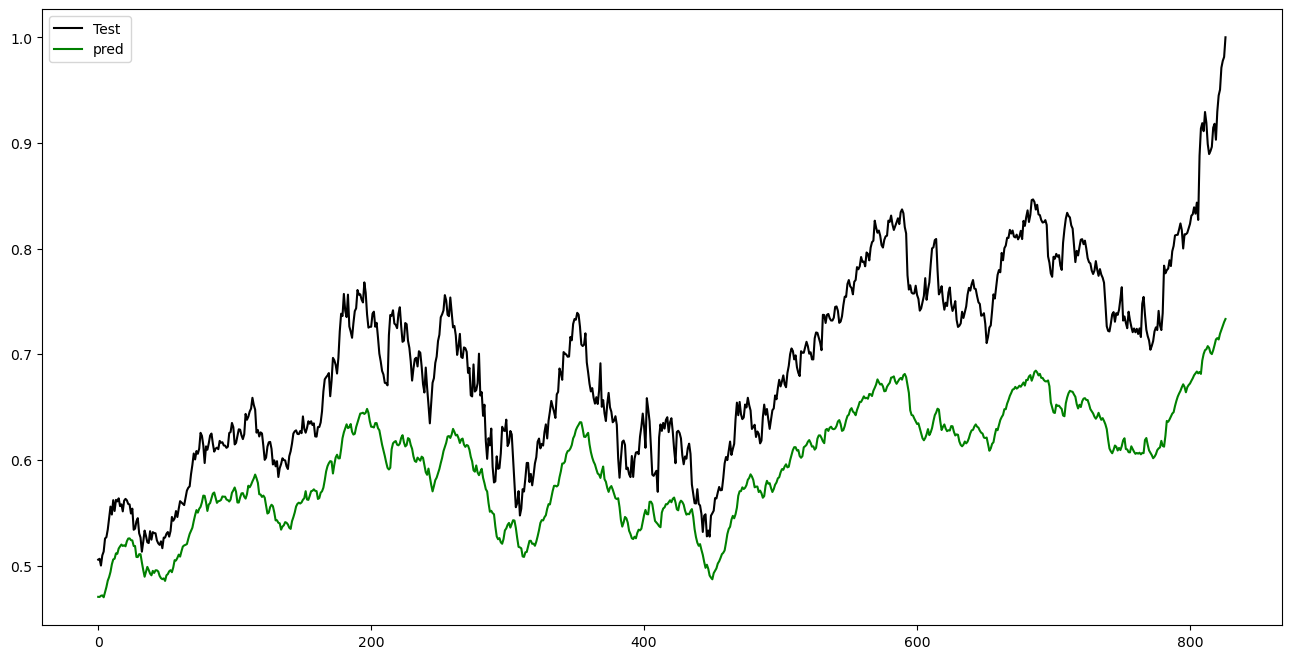

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:

# Assuming y_test and y_pred are NumPy arrays
indices = np.arange(len(y_test))  # Create an array of indices for the x-axis

# Adjust bar width as needed
bar_width = 0.5
plt.figure(figsize=(16, 8))
plt.bar(indices, y_test.flatten(), width=bar_width, label='Actual')
plt.bar(indices + bar_width, y_pred.flatten(), width=bar_width, label='Predicted')

plt.xlabel('Data Point')
plt.ylabel('TargetNextClose')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.01088822600436186


In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.10434666264122615


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.09528571697484584


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.24857650934660902


In [ ]:
# Assuming 'y_pred' is your NumPy array of predictions and 'data_set' is your original DataFrame
temp_df = pd.DataFrame(data_set_scaled[splitlimit+backcandles:, :-1])
temp_df['Predictions'] = y_pred
temp_df_scaled_back = sc.inverse_transform(temp_df)  # Scale back the temporary DataFrame
y_pred_scaled_back = temp_df_scaled_back[:, -1]  # Extract the scaled back predictions

In [ ]:
# predict Value
predictData = yf.download(tickers = 'AAPL', start = '2024-06-14',end = '2024-07-14')

[*********************100%***********************]  1 of 1 completed


#LSTM

In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 21
print(data_set_scaled.shape[0])
for j in range(9):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

4362
[[[0.0013772  0.00126002 0.00156386 ... 0.42851318 0.56307372 0.00158257]
  [0.00158981 0.00135621 0.00162935 ... 0.4263747  0.51167651 0.00183081]
  [0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  ...
  [0.00233711 0.00199963 0.00244722 ... 0.42910964 0.57674006 0.00239712]
  [0.00251006 0.00209739 0.00237055 ... 0.42701478 0.52889    0.00249021]
  [0.00226571 0.00193339 0.00242965 ... 0.42938601 0.58320485 0.00223266]]

 [[0.00158981 0.00135621 0.00162935 ... 0.4263747  0.51167651 0.00183081]
  [0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  [0.00167707 0.00131837 0.00177472 ... 0.42788764 0.54806094 0.0017672 ]
  ...
  [0.00251006 0.00209739 0.00237055 ... 0.42701478 0.52889    0.00249021]
  [0.00226571 0.00193339 0.00242965 ... 0.42938601 0.58320485 0.00223266]
  [0.0023022  0.0018845  0.00225713 ... 0.42609832 0.50773108 0.0021706 ]]

 [[0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  [0.00167707 0.0

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.9)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
data_set.head(10)

3906
(3906, 21, 9)
(435, 21, 9)
(3906, 1)
(435, 1)
[[0.0021706 ]
 [0.00186805]
 [0.00205268]
 ...
 [0.59163661]
 [0.58885627]
 [0.60905726]]


,opening_price,highest_price,lowest_price,closing_price,volume,turnover,ups_and_downs,change,Close_next_day
0,3.145357,3.213929,3.142500,3.209643,729408400,2.341140e+09,0.000000,0.000000,3.157143
1,3.193214,3.235714,3.157143,3.157143,867890800,2.740055e+09,-0.052500,-1.635689,3.214286
2,3.164286,3.214286,3.140000,3.214286,796586000,2.560455e+09,0.057143,1.809958,3.198929
3,3.212857,3.227143,3.189643,3.198929,559498800,1.789797e+09,-0.015357,-0.477774,3.199643
4,3.197857,3.213929,3.190000,3.199643,571704000,1.829249e+09,0.000714,0.022315,3.254643
5,3.222857,3.269643,3.199643,3.254643,712961200,2.320434e+09,0.055000,1.718944,3.267143
6,3.262500,3.280000,3.252143,3.267143,488916400,1.597360e+09,0.012500,0.384068,3.352500
7,3.285357,3.357143,3.273214,3.352500,686896000,2.302819e+09,0.085357,2.612587,3.355714
8,3.347500,3.370000,3.321429,3.355714,561492400,1.884208e+09,0.003214,0.095872,3.340000
9,3.333929,3.359643,3.332143,3.340000,450884000,1.505953e+09,-0.015714,-0.468281,3.423214


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(50)
batch_size = 128
epochs = 1500

lstm_input = Input(shape=(backcandles, 9), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(64, name='dense_layer', activation='relu')(inputs)
inputs = Dense(64, name='dense_layer_2', activation='relu')(inputs)
inputs = Dense(32, name='dense_layer_3', activation='relu')(inputs)
inputs = Dense(1, name='dense_layer_output')(inputs)
lstm_output = Activation('linear', name='output')(inputs)
lstm_model = Model(inputs=lstm_input, outputs=lstm_output)


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
lstm_model.compile(optimizer=optimizer, loss='mse')


lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 21, 9)]           0         
                                                                 
 first_layer (LSTM)          (None, 150)               96000     
                                                                 
 dense_layer (Dense)         (None, 64)                9664      
                                                                 
 dense_layer_2 (Dense)       (None, 64)                4160      
                                                                 
 dense_layer_3 (Dense)       (None, 32)                2080      
                                                                 
 dense_layer_output (Dense)  (None, 1)                 33        
                                                                 
 output (Activation)         (None, 1)                 0     

In [ ]:
# lstm_adam = optimizers.Adam()
# lstm_model.compile(optimizer=adam, loss='mse')
lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/2000
28/28 [==============================] - 4s 54ms/step - loss: 0.0040 - val_loss: 6.5429e-04
Epoch 2/2000
28/28 [==============================] - 1s 32ms/step - loss: 1.0134e-04 - val_loss: 7.3548e-04
Epoch 3/2000
28/28 [==============================] - 1s 30ms/step - loss: 6.4572e-05 - val_loss: 9.2261e-04
Epoch 4/2000
28/28 [==============================] - 1s 30ms/step - loss: 5.4156e-05 - val_loss: 6.6814e-04
Epoch 5/2000
28/28 [==============================] - 1s 31ms/step - loss: 5.3247e-05 - val_loss: 0.0011
Epoch 6/2000
28/28 [==============================] - 1s 46ms/step - loss: 5.2208e-05 - val_loss: 5.4186e-04
Epoch 7/2000
28/28 [==============================] - 1s 48ms/step - loss: 4.7249e-05 - val_loss: 5.6121e-04
Epoch 8/2000
28/28 [==============================] - 1s 46ms/step - loss: 4.4951e-05 - val_loss: 7.3140e-04
Epoch 9/2000
28/28 [==============================] - 1s 46ms/step - loss: 4.4385e-05 - val_loss: 4.9343e-04
Epoch 10/2000
28/28 [======

In [ ]:
lstm_y_pred = lstm_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(lstm_y_pred[i], y_test[i])

14/14 [==============================] - 1s 7ms/step
[0.6122323] [0.58903008]
[0.602267] [0.60653757]
[0.60269237] [0.6123589]
[0.5804821] [0.61283677]
[0.60537535] [0.61079495]
[0.5819837] [0.62765082]
[0.5937254] [0.63712135]
[0.6005189] [0.64967635]
[0.6229713] [0.63668696]
[0.6198025] [0.61692042]


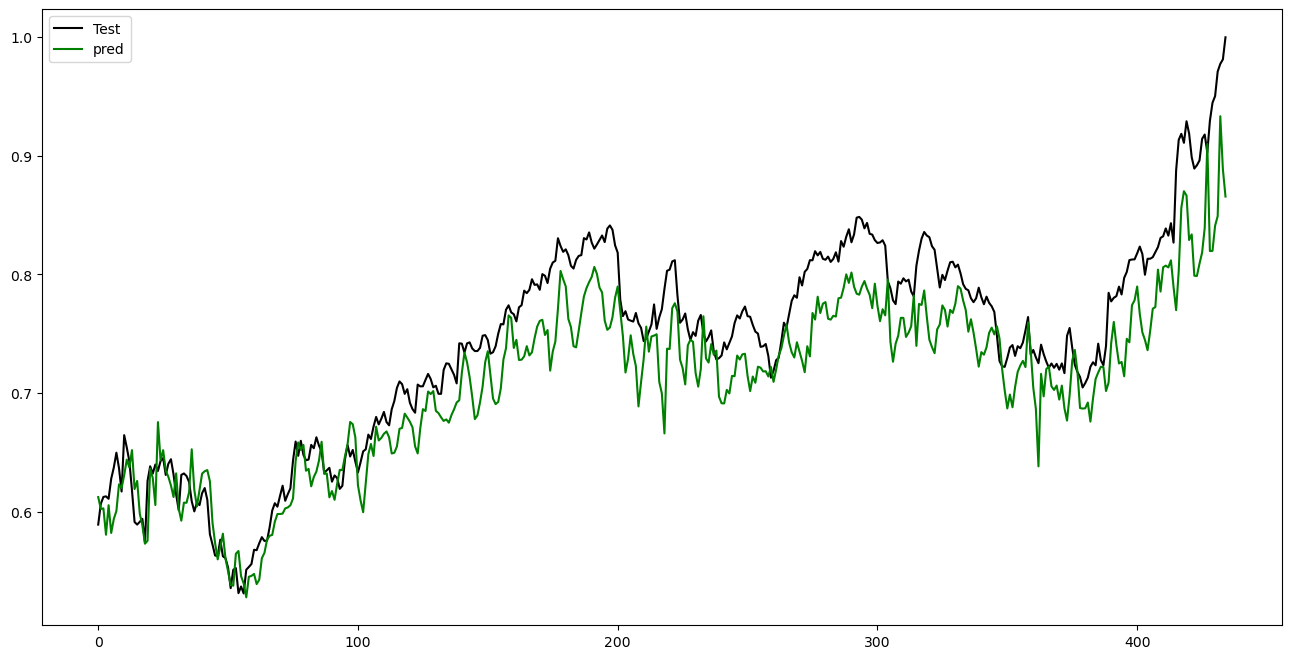

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(lstm_y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
print("MSE:", lstm_mse)

MSE: 0.0015116791359827278


In [ ]:

lstm_rmse = np.sqrt(lstm_mse)
print("RMSE:", lstm_rmse)

RMSE: 0.03888031810547244


In [ ]:
from sklearn.metrics import mean_absolute_error
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
print("MAE:", lstm_mae)

MAE: 0.03422406996004587


In [ ]:
from sklearn.metrics import r2_score
lstm_r2 = r2_score(y_test, lstm_y_pred)
print("R-squared:", lstm_r2)

R-squared: 0.8075843456209805


# Less Dense LSTM

In [ ]:
# multiple feature from data provided to the model
X = []

backcandles = 21
print(data_set_scaled.shape[0])
for j in range(9): #data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]): #backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

# move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi,(len(yi),1))

print(X)
print(X.shape)
print(y)
print(y.shape)

4362
[[[0.0013772  0.00126002 0.00156386 ... 0.42851318 0.56307372 0.00158257]
  [0.00158981 0.00135621 0.00162935 ... 0.4263747  0.51167651 0.00183081]
  [0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  ...
  [0.00233711 0.00199963 0.00244722 ... 0.42910964 0.57674006 0.00239712]
  [0.00251006 0.00209739 0.00237055 ... 0.42701478 0.52889    0.00249021]
  [0.00226571 0.00193339 0.00242965 ... 0.42938601 0.58320485 0.00223266]]

 [[0.00158981 0.00135621 0.00162935 ... 0.4263747  0.51167651 0.00183081]
  [0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  [0.00167707 0.00131837 0.00177472 ... 0.42788764 0.54806094 0.0017672 ]
  ...
  [0.00251006 0.00209739 0.00237055 ... 0.42701478 0.52889    0.00249021]
  [0.00226571 0.00193339 0.00242965 ... 0.42938601 0.58320485 0.00223266]
  [0.0023022  0.0018845  0.00225713 ... 0.42609832 0.50773108 0.0021706 ]]

 [[0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  [0.00167707 0.0

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.9)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
data_set.head(10)

3906
(3906, 21, 9)
(435, 21, 9)
(3906, 1)
(435, 1)
[[0.0021706 ]
 [0.00186805]
 [0.00205268]
 ...
 [0.59163661]
 [0.58885627]
 [0.60905726]]


,opening_price,highest_price,lowest_price,closing_price,volume,turnover,ups_and_downs,change,Close_next_day
0,3.145357,3.213929,3.142500,3.209643,729408400,2.341140e+09,0.000000,0.000000,3.157143
1,3.193214,3.235714,3.157143,3.157143,867890800,2.740055e+09,-0.052500,-1.635689,3.214286
2,3.164286,3.214286,3.140000,3.214286,796586000,2.560455e+09,0.057143,1.809958,3.198929
3,3.212857,3.227143,3.189643,3.198929,559498800,1.789797e+09,-0.015357,-0.477774,3.199643
4,3.197857,3.213929,3.190000,3.199643,571704000,1.829249e+09,0.000714,0.022315,3.254643
5,3.222857,3.269643,3.199643,3.254643,712961200,2.320434e+09,0.055000,1.718944,3.267143
6,3.262500,3.280000,3.252143,3.267143,488916400,1.597360e+09,0.012500,0.384068,3.352500
7,3.285357,3.357143,3.273214,3.352500,686896000,2.302819e+09,0.085357,2.612587,3.355714
8,3.347500,3.370000,3.321429,3.355714,561492400,1.884208e+09,0.003214,0.095872,3.340000
9,3.333929,3.359643,3.332143,3.340000,450884000,1.505953e+09,-0.015714,-0.468281,3.423214


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(50)
batch_size = 128
epochs = 200

LD_lstm_input = Input(shape=(backcandles, 9), name='lstm_input')
inputs = LSTM(64, name='first_layer')(LD_lstm_input)
# inputs = Dense(64, name='dense_layer', activation='relu')(inputs)
# inputs = Dense(64, name='dense_layer_2', activation='relu')(inputs)
inputs = Dense(32, name='dense_layer_3', activation='relu')(inputs)
inputs = Dense(1, name='dense_layer_output')(inputs)
LD_lstm_output = Activation('linear', name='output')(inputs)
LD_lstm_model = Model(inputs=LD_lstm_input, outputs=LD_lstm_output)


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
LD_lstm_model.compile(optimizer=optimizer, loss='mse')


LD_lstm_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 21, 9)]           0         
                                                                 
 first_layer (LSTM)          (None, 64)                18944     
                                                                 
 dense_layer_3 (Dense)       (None, 32)                2080      
                                                                 
 dense_layer_output (Dense)  (None, 1)                 33        
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 21,057
Trainable params: 21,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LD_lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/200
28/28 [==============================] - 4s 35ms/step - loss: 0.0031 - val_loss: 7.4419e-04
Epoch 2/200
28/28 [==============================] - 0s 15ms/step - loss: 1.1175e-04 - val_loss: 9.3413e-04
Epoch 3/200
28/28 [==============================] - 0s 15ms/step - loss: 6.2649e-05 - val_loss: 0.0011
Epoch 4/200
28/28 [==============================] - 0s 15ms/step - loss: 5.4992e-05 - val_loss: 8.3719e-04
Epoch 5/200
28/28 [==============================] - 0s 15ms/step - loss: 5.1598e-05 - val_loss: 9.0479e-04
Epoch 6/200
28/28 [==============================] - 0s 17ms/step - loss: 4.8696e-05 - val_loss: 5.6307e-04
Epoch 7/200
28/28 [==============================] - 0s 15ms/step - loss: 4.5682e-05 - val_loss: 8.0472e-04
Epoch 8/200
28/28 [==============================] - 0s 15ms/step - loss: 4.0835e-05 - val_loss: 6.7813e-04
Epoch 9/200
28/28 [==============================] - 0s 14ms/step - loss: 4.6907e-05 - val_loss: 5.6698e-04
Epoch 10/200
28/28 [================

In [ ]:
LD_lstm_y_pred = LD_lstm_model.predict(X_test)

for i in range(10):
    print(LD_lstm_y_pred[i], y_test[i])

14/14 [==============================] - 1s 4ms/step
[0.5952002] [0.58903008]
[0.6021989] [0.60653757]
[0.5941082] [0.6123589]
[0.6076088] [0.61283677]
[0.61280113] [0.61079495]
[0.61107534] [0.62765082]
[0.6139039] [0.63712135]
[0.6270118] [0.64967635]
[0.63613564] [0.63668696]
[0.64172626] [0.61692042]


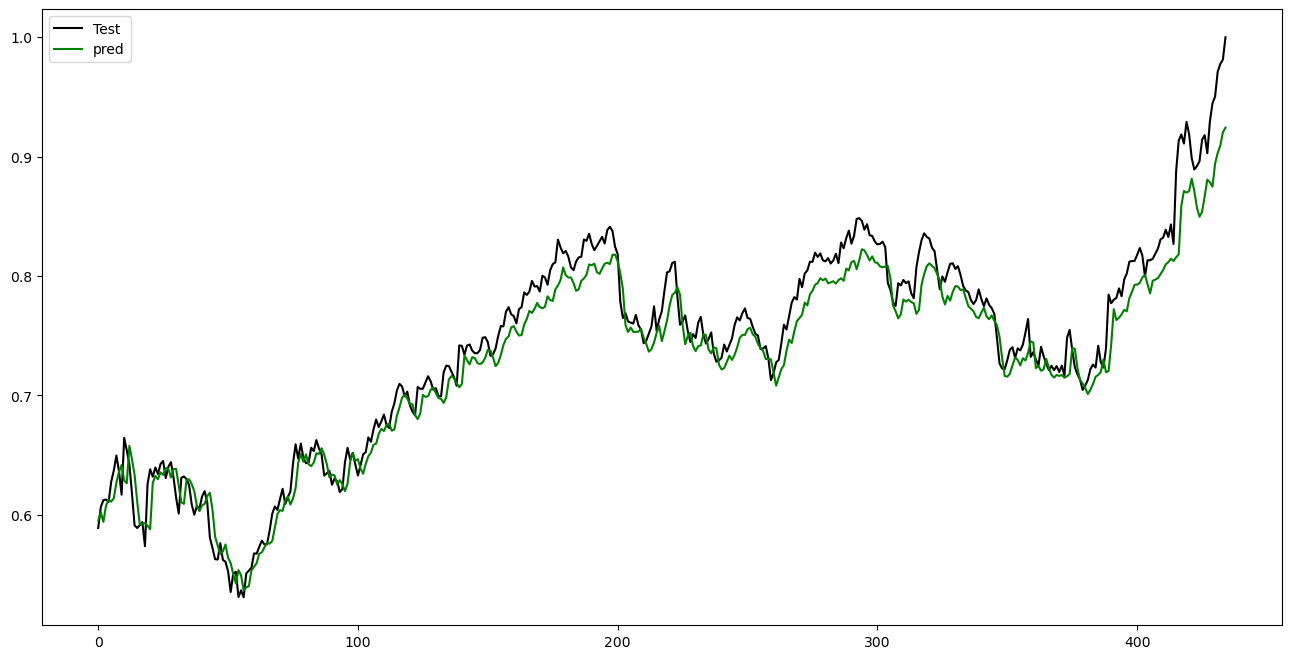

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(LD_lstm_y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, LD_lstm_y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, LD_lstm_y_pred)
print("MAE:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, LD_lstm_y_pred)
print("R-squared:", r2)

MSE: 0.0004801541957090614
RMSE: 0.021912421037143782
MAE: 0.01714196066173682
R-squared: 0.9387189776263678


#Dense CNN-LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, Convolution1D, MaxPooling1D, Flatten,  Embedding, Conv1D, GlobalMaxPooling1D
import numpy as np

# Define model parameters
conv_filters = 32
conv_kernel_size = 1
conv_activation = 'tanh'
conv_padding = 'same'

pool_size = 1
pool_padding = 'same'

lstm_units = 150
lstm_activation = 'tanh'

# time_step = 10

batch_size = 128
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
# loss_function = 'mean_absolute_error'
epochs = 200

# Define the input
cnn_lstm_input = Input(shape=(backcandles, 9), name='cnn_lstm_input')

# Define the layers
cnn_lstm_conv_layer = Conv1D(filters=conv_filters, kernel_size=conv_kernel_size, activation=conv_activation, padding=conv_padding, name='conv_layer')(cnn_lstm_input)
pooling_layer = MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(cnn_lstm_conv_layer)
cnn_lstm_layer = LSTM(lstm_units, activation=lstm_activation, name='lstm_layer')(pooling_layer)
cnn_lstm_dense_layer_1 = Dense(32, activation='relu', name='dense_layer_1')(cnn_lstm_layer)
cnn_lstm_dense_layer_2 = Dense(32, activation='relu', name='dense_layer_3')(cnn_lstm_dense_layer_1)
cnn_lstm_dense_layer_output = Dense(1, name='dense_layer_output')(cnn_lstm_dense_layer_2)
cnn_lstm_output = Activation('linear', name='output')(cnn_lstm_dense_layer_output)

# Define the model
cnn_lstm_model = Model(inputs=cnn_lstm_input, outputs=cnn_lstm_output)

# # Compile the model
cnn_lstm_model.compile(optimizer=optimizer, loss=['mse'])

# Summary of the model
cnn_lstm_model.summary()


KeyboardInterrupt



In [ ]:
cnn_lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/200
28/28 [==============================] - 4s 44ms/step - loss: 0.0275 - val_loss: 0.0035
Epoch 2/200
28/28 [==============================] - 1s 22ms/step - loss: 2.2768e-04 - val_loss: 0.0021
Epoch 3/200
28/28 [==============================] - 1s 21ms/step - loss: 9.6889e-05 - val_loss: 0.0033
Epoch 4/200
28/28 [==============================] - 1s 20ms/step - loss: 6.3751e-05 - val_loss: 0.0041
Epoch 5/200
28/28 [==============================] - 1s 21ms/step - loss: 6.1431e-05 - val_loss: 0.0020
Epoch 6/200
28/28 [==============================] - 1s 22ms/step - loss: 4.7700e-05 - val_loss: 0.0015
Epoch 7/200
28/28 [==============================] - 1s 22ms/step - loss: 5.3548e-05 - val_loss: 0.0027
Epoch 8/200
28/28 [==============================] - 1s 22ms/step - loss: 1.0941e-04 - val_loss: 7.7136e-04
Epoch 9/200
28/28 [==============================] - 1s 21ms/step - loss: 6.7469e-05 - val_loss: 0.0016
Epoch 10/200
28/28 [==============================] - 1s 22ms/st

14/14 [==============================] - 1s 8ms/step
[0.5976173] [0.58903008]
[0.5751362] [0.60653757]
[0.5971643] [0.6123589]
[0.5990104] [0.61283677]
[0.6007396] [0.61079495]
[0.59543437] [0.62765082]
[0.61290705] [0.63712135]
[0.6166547] [0.64967635]
[0.62627625] [0.63668696]
[0.61795145] [0.61692042]


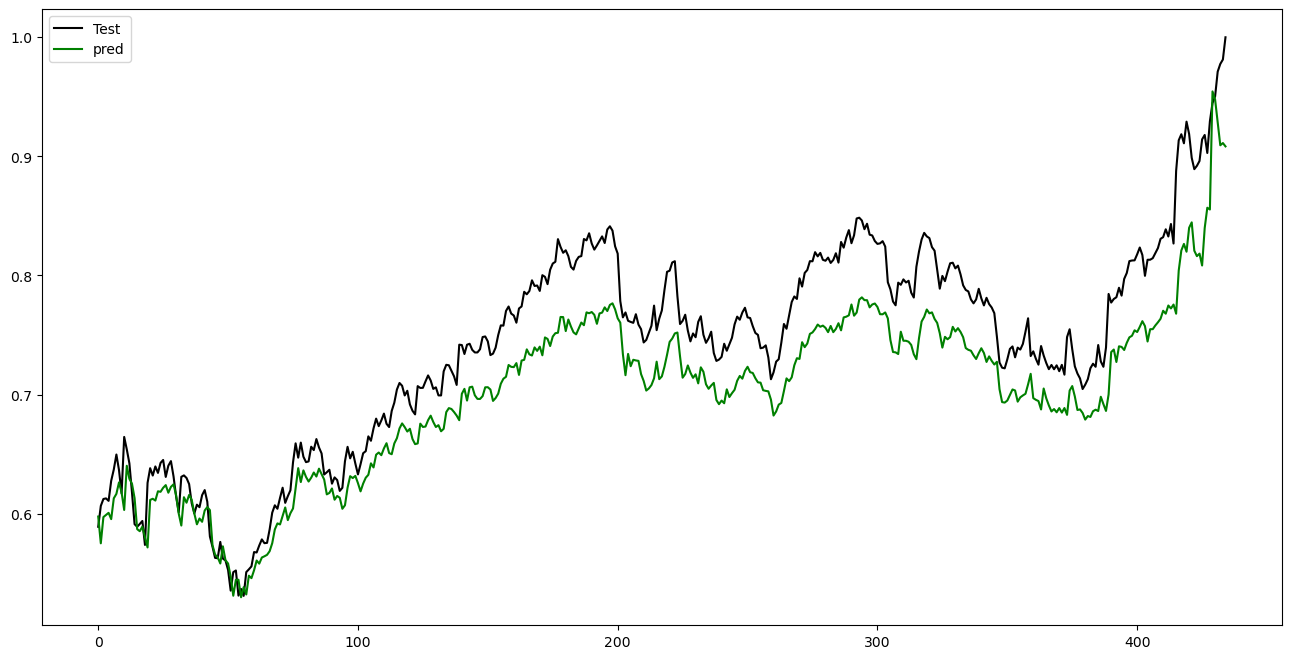

In [ ]:
y_pred = cnn_lstm_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

# Less dense LSTM-CNN

In [20]:
# multiple feature from data provided to the model
X = []

backcandles = 21
print(data_set_scaled.shape[0])
for j in range(9): #data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X = np.moveaxis(X, [0], [2])

X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi, (len(yi), 1))

# print(X)
print(X.shape)
# print(y)
print(y.shape)

4362
(4341, 21, 9)
(4341, 1)


In [21]:
# split data into train test sets
splitlimit = int(len(X)*0.9)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
data_set.head(10)

3906
(3906, 21, 9)
(435, 21, 9)
(3906, 1)
(435, 1)
[[0.0021706 ]
 [0.00186805]
 [0.00205268]
 ...
 [0.59163661]
 [0.58885627]
 [0.60905726]]


,opening_price,highest_price,lowest_price,closing_price,volume,turnover,ups_and_downs,change,Close_next_day
0,3.145357,3.213929,3.142500,3.209643,729408400,2.341140e+09,0.000000,0.000000,3.157143
1,3.193214,3.235714,3.157143,3.157143,867890800,2.740055e+09,-0.052500,-1.635689,3.214286
2,3.164286,3.214286,3.140000,3.214286,796586000,2.560455e+09,0.057143,1.809958,3.198929
3,3.212857,3.227143,3.189643,3.198929,559498800,1.789797e+09,-0.015357,-0.477774,3.199643
4,3.197857,3.213929,3.190000,3.199643,571704000,1.829249e+09,0.000714,0.022315,3.254643
5,3.222857,3.269643,3.199643,3.254643,712961200,2.320434e+09,0.055000,1.718944,3.267143
6,3.262500,3.280000,3.252143,3.267143,488916400,1.597360e+09,0.012500,0.384068,3.352500
7,3.285357,3.357143,3.273214,3.352500,686896000,2.302819e+09,0.085357,2.612587,3.355714
8,3.347500,3.370000,3.321429,3.355714,561492400,1.884208e+09,0.003214,0.095872,3.340000
9,3.333929,3.359643,3.332143,3.340000,450884000,1.505953e+09,-0.015714,-0.468281,3.423214


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, initializers
# Model parameters
conv_filters = 96
conv_kernel_size = 1
conv_activation = 'tanh'
conv_padding = 'same'

pool_size = 1
pool_padding = 'same'

lstm_units = 144
lstm_activation = 'tanh'

dense_layer1 = 16

time_step = backcandles
features = 9  # Adjust this to match your data's feature size

batch_size = 256
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_function = 'mean_absolute_error'
epochs = 200

# Define initializers
weight_initializer = initializers.GlorotUniform()
bias_initializer = initializers.Zeros()

# Define the input
lstm_input = Input(shape=(time_step, features), name='lstm_input')

# Define the layers with initializers
conv_layer = layers.Conv1D(filters=conv_filters, kernel_size=conv_kernel_size,
                           activation=conv_activation, padding=conv_padding,
                           kernel_initializer=weight_initializer,
                           bias_initializer=bias_initializer, name='conv_layer')(lstm_input)
pooling_layer = layers.MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(conv_layer)
lstm_layer = layers.LSTM(lstm_units, activation=lstm_activation,
                         kernel_initializer=weight_initializer,
                         bias_initializer=bias_initializer, name='lstm_layer')(pooling_layer) #
dense_layer = layers.Dense(dense_layer1, name='dense_layer',
                           kernel_initializer=weight_initializer,
                           bias_initializer=bias_initializer)(lstm_layer)
# output = layers.Activation('linear', name='output')(dense_layer)
output = layers.Dense(1, activation='linear', name='output')(dense_layer)
# Define the model
less_dense_lstm_cnn_model = Model(inputs=lstm_input, outputs=output)

# Compile the model
less_dense_lstm_cnn_model.compile(optimizer=optimizer, loss=['mse'])

# Summary of the model
less_dense_lstm_cnn_model.summary()

# Assuming you have training data in `X_train` and `y_train`
# Here X_train and y_train are placeholders, replace with your actual data
# X_train = scaled_data
# y_train = np.random.rand(1000, 1)  # Replace with your actual labels

# You can fit the model with:
# model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 21, 9)]           0         
                                                                 
 conv_layer (Conv1D)         (None, 21, 96)            960       
                                                                 
 pooling_layer (MaxPooling1D  (None, 21, 96)           0         
 )                                                               
                                                                 
 lstm_layer (LSTM)           (None, 144)               138816    
                                                                 
 dense_layer (Dense)         (None, 16)                2320      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                           

C:\Users\mudit\anaconda3\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [23]:
less_dense_lstm_cnn_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.2)

Epoch 1/200
13/13 [==============================] - 3s 105ms/step - loss: 0.0241 - val_loss: 0.0022
Epoch 2/200
13/13 [==============================] - 1s 85ms/step - loss: 0.0022 - val_loss: 0.0116
Epoch 3/200
13/13 [==============================] - 1s 76ms/step - loss: 5.6450e-04 - val_loss: 0.0037
Epoch 4/200
13/13 [==============================] - 1s 78ms/step - loss: 1.3441e-04 - val_loss: 6.7073e-04
Epoch 5/200
13/13 [==============================] - 1s 83ms/step - loss: 7.1208e-05 - val_loss: 0.0011
Epoch 6/200
13/13 [==============================] - 1s 83ms/step - loss: 2.8746e-05 - val_loss: 0.0012
Epoch 7/200
13/13 [==============================] - 1s 84ms/step - loss: 2.3701e-05 - val_loss: 8.5773e-04
Epoch 8/200
13/13 [==============================] - 1s 85ms/step - loss: 2.0898e-05 - val_loss: 8.9489e-04
Epoch 9/200
13/13 [==============================] - 1s 76ms/step - loss: 1.9558e-05 - val_loss: 9.2578e-04
Epoch 10/200
13/13 [==============================] - 1

14/14 [==============================] - 0s 7ms/step
[0.5647395] [0.58903008]
[0.5673508] [0.60653757]
[0.56295455] [0.6123589]
[0.5742688] [0.61283677]
[0.57730395] [0.61079495]
[0.57873714] [0.62765082]
[0.58295715] [0.63712135]
[0.5926147] [0.64967635]
[0.6006118] [0.63668696]
[0.6073255] [0.61692042]


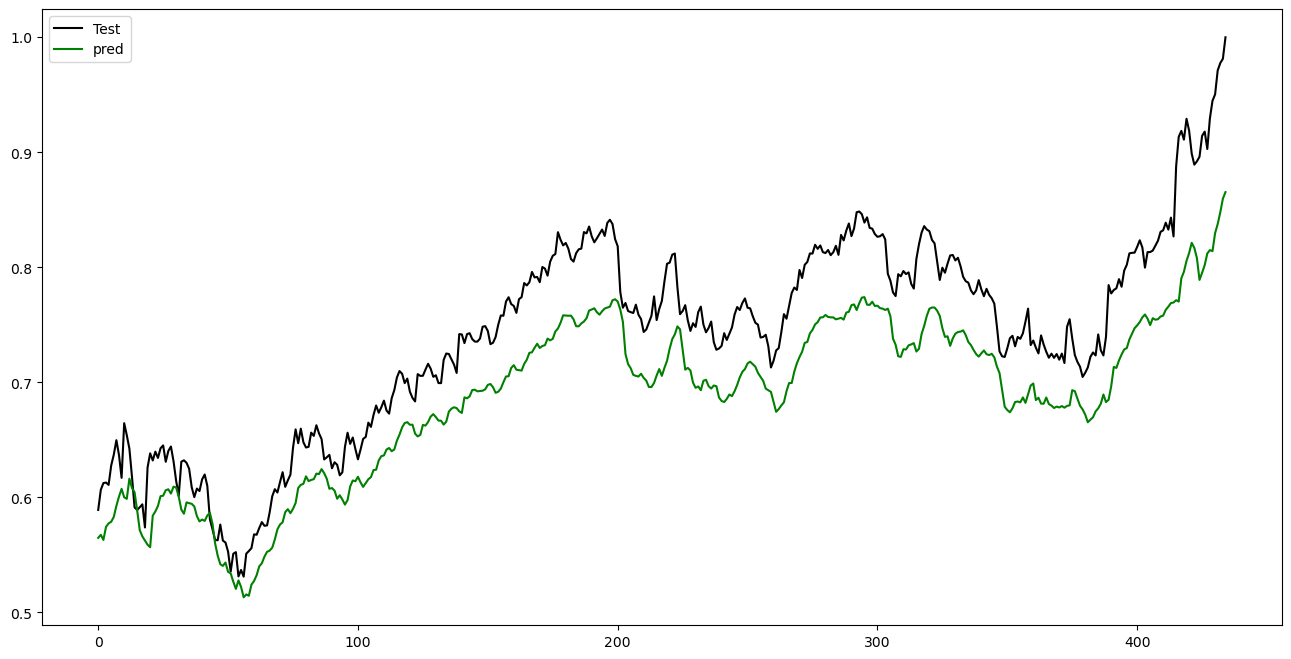

In [24]:
y_pred = less_dense_lstm_cnn_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

MSE: 0.0032791834608828846
RMSE: 0.05726415511367373
MAE: 0.052559444464101775
R-squared: 0.5814850378702705


In [36]:
y_pred_original_scale = sc.inverse_transform(y_pred[], y_pred[:, -1])

ValueError: Expected 2D array, got 1D array instead:
array=[0.5647395  0.5673508  0.56295455 0.5742688  0.57730395 0.57873714
 0.58295715 0.5926147  0.6006118  0.6073255  0.6000095  0.5986406
 0.6161625  0.608112   0.604366   0.5886155  0.5713757  0.5660076
 0.5623981  0.55876565 0.55659115 0.5840187  0.58770883 0.59252113
 0.60098463 0.6013939  0.6061296  0.60697263 0.6032308  0.6092478
 0.6085588  0.60057    0.5892928  0.5857021  0.5955477  0.59489286
 0.5943192  0.59201664 0.58363426 0.57900935 0.5806412  0.5794645
 0.5841877  0.5864342  0.5770365  0.5599962  0.5492475  0.54182446
 0.5403575  0.5432574  0.5351309  0.53384453 0.52667373 0.5203683
 0.52774984 0.52205485 0.51306874 0.5155229  0.51436776 0.5240812
 0.52725446 0.53231007 0.5399706  0.5426365  0.5483913  0.5525988
 0.5536457  0.5561858  0.56336313 0.57215476 0.57633865 0.57826704
 0.5870452  0.5896844  0.58619153 0.5900096  0.5950325  0.6080778
 0.61084324 0.6117418  0.61822116 0.61407757 0.615091   0.6157908
 0.6205798  0.620222   0.62451595 0.6210032  0.6160838  0.60740536
 0.6080285  0.6057522  0.5987506  0.60178035 0.5980502  0.5936479
 0.59761125 0.60936755 0.6146315  0.61394656 0.6178443  0.6129838
 0.6090561  0.61244476 0.61569303 0.61753494 0.6236777  0.6239964
 0.6320426  0.6357774  0.63642174 0.64153284 0.6428731  0.64005136
 0.6415834  0.6492805  0.65448684 0.6607602  0.6645973  0.66531146
 0.66307044 0.66314965 0.65534246 0.65296227 0.6542522  0.66294074
 0.66234595 0.6654695  0.67019814 0.67232794 0.669761   0.6667144
 0.6665935  0.66320354 0.6657773  0.67449564 0.67710286 0.6782875
 0.67756444 0.67475945 0.6733651  0.68689376 0.68606    0.6878308
 0.6932124  0.6935806  0.69213766 0.6924322  0.6926876  0.69390446
 0.6977685  0.69850403 0.69576293 0.69084233 0.6917876  0.6944793
 0.70004267 0.70505375 0.70529306 0.7125276  0.71490914 0.7109503
 0.71051246 0.7101492  0.71599483 0.71960896 0.7256096  0.72608507
 0.73002046 0.7334995  0.72982156 0.73158765 0.73224145 0.73799986
 0.73648113 0.7377947  0.74419755 0.7467948  0.75175685 0.75824255
 0.7580772  0.7578686  0.75797796 0.75479084 0.74875146 0.7486785
 0.7512137  0.75283724 0.7556939  0.7624113  0.76330703 0.7643327
 0.76092356 0.75880116 0.7617827  0.7641733  0.76499027 0.7657451
 0.77127963 0.7722112  0.77022094 0.763295   0.75253874 0.7245776
 0.7158151  0.71226835 0.7064455  0.70561343 0.70501655 0.70743966
 0.7038197  0.7014758  0.69591904 0.6958731  0.69943273 0.7059342
 0.71148515 0.7056166  0.71257204 0.7187248  0.7291253  0.7374851
 0.7417249  0.74861336 0.7460484  0.72863424 0.7109981  0.7125359
 0.7102503  0.6997229  0.6951917  0.69640666 0.6931043  0.70131797
 0.70220363 0.6966649  0.69457054 0.69717664 0.6966305  0.68678814
 0.6837829  0.68282694 0.6855793  0.6893818  0.68798417 0.69224554
 0.6976737  0.7042979  0.7090881  0.71156645 0.71641964 0.717919
 0.71577233 0.71356446 0.70819867 0.70466983 0.7013876  0.6944922
 0.69307595 0.6916571  0.68303436 0.6743368  0.6767233  0.67985874
 0.6826286  0.6922939  0.69938856 0.6993733  0.7093685  0.7165943
 0.7219866  0.72652584 0.7342506  0.735053   0.7424986  0.74561805
 0.75036055 0.75228363 0.75635034 0.75653744 0.75852585 0.75679135
 0.7564766  0.75644106 0.7547423  0.75542027 0.75600356 0.7545001
 0.76061016 0.7613006  0.7670475  0.76772434 0.76286066 0.76873773
 0.7736203  0.7740418  0.7675279  0.7672954  0.7700253  0.7663694
 0.76659864 0.76451534 0.7640146  0.76288915 0.76400816 0.75740016
 0.73792493 0.7326728  0.7226564  0.7221023  0.7287362  0.7285163
 0.73210925 0.732941   0.73407346 0.7267535  0.7292073  0.74198824
 0.7490507  0.75770825 0.76395065 0.7650359  0.76498884 0.7622526
 0.7577284  0.7470601  0.73948604 0.73999184 0.73167425 0.7381163
 0.74225694 0.7437406  0.7440526  0.74518555 0.7409992  0.7350121
 0.73231864 0.7281792  0.7245501  0.72232175 0.7252019  0.72768146
 0.72443503 0.7236519  0.7248097  0.72169626 0.7136938  0.7080483
 0.6930863  0.67871517 0.6758657  0.6739237  0.6774415  0.68284947
 0.68327874 0.6825373  0.6868345  0.6821209  0.6896136  0.6971617
 0.69894814 0.6845357  0.686584   0.68147385 0.6813782  0.68677
 0.681141   0.679665   0.67764956 0.67888933 0.67808074 0.6793198
 0.67794734 0.6794456  0.67997766 0.6931376  0.69227296 0.68579537
 0.67961377 0.6763812  0.6718492  0.6652569  0.6674984  0.66960305
 0.6746797  0.67736536 0.68135554 0.6893941  0.68278664 0.6848363
 0.69648165 0.7133671  0.712511   0.7190317  0.7241549  0.7285734
 0.72973126 0.7372605  0.74221206 0.7470353  0.74947935 0.7524063
 0.75646025 0.75896007 0.75535655 0.7497472  0.7557216  0.7544287
 0.75487334 0.75719994 0.757949   0.7630032  0.76579005 0.76888186
 0.76937765 0.7713934  0.7701934  0.790372   0.79615414 0.80560863
 0.8123887  0.8212778  0.8168865  0.8080335  0.7890301  0.79521126
 0.8019262  0.8120157  0.8149527  0.8140108  0.8296941  0.83759034
 0.84781986 0.85966545 0.86537343].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Hypertuning parameters less Dense CNN-LSTM

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Input, Model
import keras_tuner as kt
batch_size = 128

def build_model(hp):

    features = 9
    time_step = 10 # hp.Choice('time_step', values=[7, 14, 21, 28, 35])
    batch_size = hp.Choice('batch_size', values=[16, 32, 64, 128, 256, 512])
    # Model parameters with hyperparameter options
    conv_filters = hp.Int('conv_filters', min_value=16, max_value=128, step=8)
    conv_kernel_size = 1
    conv_activation = 'tanh'
    conv_padding = 'same'

    pool_size = 1
    pool_padding = 'same'

    lstm_units = hp.Int('lstm_units', min_value=32, max_value=256, step=8)
    lstm_activation = 'tanh'


    dense_units = hp.Int('dense_units', min_value=16, max_value=64, step=16)

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Define the input
    lstm_input = Input(shape=(time_step, features), name='lstm_input')

    # Define the layers with initializers
    conv_layer = layers.Conv1D(filters=conv_filters, kernel_size=conv_kernel_size,
                               activation=conv_activation, padding=conv_padding, name='conv_layer')(lstm_input)
    pooling_layer = layers.MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(conv_layer)
    lstm_layer = layers.LSTM(lstm_units, activation=lstm_activation, name='lstm_layer')(pooling_layer)
    dense_layer = layers.Dense(dense_units, activation='relu', name='dense_layer')(lstm_layer)
    output = layers.Dense(1, activation='linear', name='output')(dense_layer)

    # Define the model
    model = Model(inputs=lstm_input, outputs=output)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_absolute_error',
                  metrics=['mae'])

    return model


In [28]:
tuner = kt.Hyperband(build_model,
                     objective='val_mae',
                     max_epochs=500,
                     factor=3,
                     directory='my_dir',
                     project_name='cnn_lstm_hyperparameter_tuning4')

# Early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

tuner.search(X_train, y_train, epochs=500, batch_size=batch_size, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
the optimal number of bath_size is {best_hps.get('batch_size')},
The optimal number of filters in the convolutional layer is {best_hps.get('conv_filters')},
the optimal number of units in the LSTM layer is {best_hps.get('lstm_units')},
the optimal number of units in the dense layer is {best_hps.get('dense_units')},
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


Trial 2 Complete [00h 00m 00s]

Best val_mae So Far: None
Total elapsed time: 00h 00m 01s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
256               |512               |batch_size
112               |16                |conv_filters
64                |96                |lstm_units
16                |32                |dense_units
0.01              |0.0001            |learning_rate
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
5                 |5                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3


Traceback (most recent call last):
  File "C:\Users\mudit\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\mudit\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mudit\anaconda3\Lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mudit\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mudit\anaconda3\Lib\s

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\mudit\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\mudit\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mudit\anaconda3\Lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mudit\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mudit\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mudit\anaconda3\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mudit\AppData\Local\Temp\__autograph_generated_filecji07iw5.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mudit\anaconda3\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 10, 9), found shape=(None, 21, 9)

